In [603]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import log_loss
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold, StratifiedShuffleSplit
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, StackingClassifier, BaggingClassifier, VotingClassifier

In [604]:
train = pd.read_csv(r'C:\Users\Rahul\Desktop\Cardiac-Risk-Prediction\Train.csv')
test = pd.read_csv(r'C:\Users\Rahul\Desktop\Cardiac-Risk-Prediction\Test.csv')
sample = pd.read_excel(r'C:\Users\Rahul\Desktop\Cardiac-Risk-Prediction\Sample_Submission.xlsx')

In [605]:
train.head()

,Gender,Chain_smoker,Consumes_other_tobacco_products,HighBP,Obese,Diabetes,Metabolic_syndrome,Use_of_stimulant_drugs,Family_history,History_of_preeclampsia,CABG_history,Respiratory_illness,UnderRisk
0,1,1,1,0,1,0,0,0,1,0,0,0,no
1,1,0,1,0,1,0,0,0,1,0,0,0,no
2,1,0,1,0,1,0,0,0,1,0,0,0,no
3,1,0,1,0,1,0,0,0,1,0,0,0,no
4,1,0,0,0,0,0,1,1,0,0,0,0,no


In [606]:
test.head()

,Gender,Chain_smoker,Consumes_other_tobacco_products,HighBP,Obese,Diabetes,Metabolic_syndrome,Use_of_stimulant_drugs,Family_history,History_of_preeclampsia,CABG_history,Respiratory_illness
0,1,0,1,1,1,0,0,0,1,0,0,0
1,1,0,1,0,1,0,0,0,1,0,0,0
2,1,1,1,0,1,0,0,0,1,0,0,0
3,2,0,0,0,1,0,0,0,1,0,0,0
4,1,0,1,0,0,0,0,1,1,0,0,0


In [607]:
train.describe()

,Gender,Chain_smoker,Consumes_other_tobacco_products,HighBP,Obese,Diabetes,Metabolic_syndrome,Use_of_stimulant_drugs,Family_history,History_of_preeclampsia,CABG_history,Respiratory_illness
count,889.000000,889.000000,889.00000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,1.258718,0.120360,0.83802,0.086614,0.919010,0.055118,0.042745,0.082115,0.925759,0.017998,0.021372,0.032621
std,0.500557,0.325565,0.36864,0.281427,0.272973,0.228339,0.202395,0.274694,0.262310,0.133018,0.144704,0.177742
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,1.00000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.00000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,2.000000,0.000000,1.00000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,2.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [608]:
test.describe()

,Gender,Chain_smoker,Consumes_other_tobacco_products,HighBP,Obese,Diabetes,Metabolic_syndrome,Use_of_stimulant_drugs,Family_history,History_of_preeclampsia,CABG_history,Respiratory_illness
count,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000
mean,1.295812,0.120419,0.793194,0.054974,0.892670,0.052356,0.060209,0.107330,0.924084,0.005236,0.020942,0.031414
std,0.511221,0.325878,0.405547,0.228228,0.309938,0.223036,0.238186,0.309938,0.265211,0.072262,0.143379,0.174662
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,2.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [609]:
train.isnull().sum()

Gender                             0
Chain_smoker                       0
Consumes_other_tobacco_products    0
HighBP                             0
Obese                              0
Diabetes                           0
Metabolic_syndrome                 0
Use_of_stimulant_drugs             0
Family_history                     0
History_of_preeclampsia            0
CABG_history                       0
Respiratory_illness                0
UnderRisk                          0
dtype: int64

In [610]:
test.isnull().sum()

Gender                             0
Chain_smoker                       0
Consumes_other_tobacco_products    0
HighBP                             0
Obese                              0
Diabetes                           0
Metabolic_syndrome                 0
Use_of_stimulant_drugs             0
Family_history                     0
History_of_preeclampsia            0
CABG_history                       0
Respiratory_illness                0
dtype: int64

In [611]:
for c in train.columns :
    print(train[c].value_counts())

1    607
2    256
0     26
Name: Gender, dtype: int64
0    782
1    107
Name: Chain_smoker, dtype: int64
1    745
0    144
Name: Consumes_other_tobacco_products, dtype: int64
0    812
1     77
Name: HighBP, dtype: int64
1    817
0     72
Name: Obese, dtype: int64
0    840
1     49
Name: Diabetes, dtype: int64
0    851
1     38
Name: Metabolic_syndrome, dtype: int64
0    816
1     73
Name: Use_of_stimulant_drugs, dtype: int64
1    823
0     66
Name: Family_history, dtype: int64
0    873
1     16
Name: History_of_preeclampsia, dtype: int64
0    870
1     19
Name: CABG_history, dtype: int64
0    860
1     29
Name: Respiratory_illness, dtype: int64
no     699
yes    190
Name: UnderRisk, dtype: int64


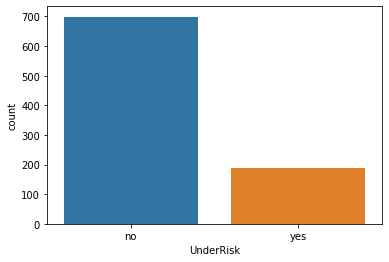

In [612]:
sns.countplot(train.UnderRisk)

# ANALYSIS

In [613]:
train.head(1)

,Gender,Chain_smoker,Consumes_other_tobacco_products,HighBP,Obese,Diabetes,Metabolic_syndrome,Use_of_stimulant_drugs,Family_history,History_of_preeclampsia,CABG_history,Respiratory_illness,UnderRisk
0,1,1,1,0,1,0,0,0,1,0,0,0,no


In [614]:
for i,c in enumerate(train.columns[:-1]):
    print(train.groupby([c,train.columns[i+1]])['UnderRisk'].value_counts(),'\n\n')

Gender  Chain_smoker  UnderRisk
0       0             no            21
                      yes            4
        1             no             1
1       0             no           376
                      yes          141
        1             no            85
                      yes            5
2       0             no           201
                      yes           39
        1             no            15
                      yes            1
Name: UnderRisk, dtype: int64 


Chain_smoker  Consumes_other_tobacco_products  UnderRisk
0             0                                no            91
                                               yes           21
              1                                no           507
                                               yes          163
1             0                                no            31
                                               yes            1
              1                                no            70
 

In [615]:
ind_no = []
train = train.groupby('Family_history').get_group(1).reset_index(drop = True)
d = test[test.Family_history==0].index
ind_no.extend(d)
del train['Family_history']
del test['Family_history']
test.drop(index = d, inplace = True)

In [616]:
len(ind_no)

29

In [617]:
train = train.groupby('CABG_history').get_group(0).reset_index(drop = True)
d = test[test.CABG_history==1].index.tolist()
del train['CABG_history']
del test['CABG_history']
ind_no.extend(d)
test.drop(index = d, inplace = True)
len(ind_no)

37

### Gen 1 -> Female

In [618]:
train[train.History_of_preeclampsia==1]

,Gender,Chain_smoker,Consumes_other_tobacco_products,HighBP,Obese,Diabetes,Metabolic_syndrome,Use_of_stimulant_drugs,History_of_preeclampsia,Respiratory_illness,UnderRisk
31,1,1,1,0,1,1,0,0,1,0,no
53,1,0,1,0,1,0,0,0,1,0,no
139,1,0,1,0,1,0,0,0,1,0,no
159,1,0,1,0,1,0,0,0,1,0,no
292,1,1,1,0,1,1,0,0,1,0,no
304,0,0,1,0,1,0,0,0,1,0,no
384,1,1,1,0,1,0,0,0,1,0,no
426,1,0,1,0,1,1,0,0,1,0,no
445,1,0,1,0,1,1,0,0,1,0,no
451,1,1,1,0,1,0,0,0,1,0,no


In [619]:
train.drop(index=304, inplace = True)
train.reset_index(drop = True, inplace = True)

In [620]:
train = train.groupby('History_of_preeclampsia').get_group(0).reset_index(drop = True)
d = test[test.History_of_preeclampsia==1].index.tolist()
del train['History_of_preeclampsia']
del test['History_of_preeclampsia']
ind_no.extend(d)
test.drop(index = d, inplace = True)
len(ind_no)

39

In [621]:
chain = []
train = train.groupby('Chain_smoker').get_group(0).reset_index(drop = True)
d = test[test.Chain_smoker==1].index.tolist()
del train['Chain_smoker']
del test['Chain_smoker']
chain.extend(d)
test.drop(index = d, inplace = True)
len(ind_no)

39

In [622]:
for c in train.columns[:-1]:
    print(train.groupby(c)['UnderRisk'].value_counts(),'\n\n')

Gender  UnderRisk
0       no            16
        yes            4
1       no           310
        yes          141
2       no           189
        yes           39
Name: UnderRisk, dtype: int64 


Consumes_other_tobacco_products  UnderRisk
0                                no            45
                                 yes           21
1                                no           470
                                 yes          163
Name: UnderRisk, dtype: int64 


HighBP  UnderRisk
0       no           483
        yes          156
1       no            32
        yes           28
Name: UnderRisk, dtype: int64 


Obese  UnderRisk
0      no            24
       yes           13
1      no           491
       yes          171
Name: UnderRisk, dtype: int64 


Diabetes  UnderRisk
0         no           493
          yes          175
1         no            22
          yes            9
Name: UnderRisk, dtype: int64 


Metabolic_syndrome  UnderRisk
0                   no           51

In [623]:
del train['Metabolic_syndrome']
del test['Metabolic_syndrome']

In [624]:
train.head(1)

,Gender,Consumes_other_tobacco_products,HighBP,Obese,Diabetes,Use_of_stimulant_drugs,Respiratory_illness,UnderRisk
0,1,1,0,1,0,0,0,no


train['disease'] = train['HighBP'].astype('str')+train.Obese.astype('str')+train.Diabetes.astype('str')+train.Respiratory_illness.astype('str')
test['disease'] = test['HighBP'].astype('str')+test.Obese.astype('str')+test.Diabetes.astype('str')+test.Respiratory_illness.astype('str')

In [625]:
train['disease'] = train.Gender.astype('str')+train.Consumes_other_tobacco_products.astype('str')+train.Use_of_stimulant_drugs.astype('str')+train['HighBP'].astype('str')+train.Obese.astype('str')+train.Diabetes.astype('str')+train.Respiratory_illness.astype('str')
test['disease'] = test.Gender.astype('str')+test.Consumes_other_tobacco_products.astype('str')+test.Use_of_stimulant_drugs.astype('str')+test['HighBP'].astype('str')+test.Obese.astype('str')+test.Diabetes.astype('str')+test.Respiratory_illness.astype('str')

In [626]:
train['any_drug'] = train.Consumes_other_tobacco_products.astype('str') + train.Use_of_stimulant_drugs.astype('str')
test['any_drug'] = test.Consumes_other_tobacco_products.astype('str') + test.Use_of_stimulant_drugs.astype('str')

In [627]:
train.groupby('disease')['UnderRisk'].value_counts()

disease  UnderRisk
0000100  no             3
         yes            1
0100100  no            12
         yes            2
0101100  no             1
0110000  yes            1
1000100  no            23
         yes           13
1000101  no             2
1001100  no             6
         yes            6
1100100  no           223
         yes           87
1100101  no             7
         yes            5
1100110  no            18
         yes            6
1100111  no             1
1101100  yes           16
         no            14
1101101  no             1
         yes            1
1101110  yes            1
1110000  no            14
         yes            6
1111000  no             1
2000100  no             7
         yes            1
2000101  no             1
2001100  no             2
2010000  no             1
2100100  no           156
         yes           26
2100101  no             4
         yes            1
2100110  no             3
         yes            2
2101100  no        

In [628]:
set(train.disease).difference(set(test.disease))

{'0000100',
 '0101100',
 '2000101',
 '2101100',
 '2101101',
 '2110001',
 '2110100',
 '2111001'}

In [629]:
set(test.disease).difference(set(train.disease))

{'1000110', '1001110', '1010000', '2011000'}

In [630]:
tr = set(train.disease).difference(set(test.disease))
te = set(test.disease).difference(set(train.disease))

train.disease = train.disease.apply(lambda x: 'other' if x in tr else x).astype('category')
test.disease = test.disease.apply(lambda x: 'other' if x in te else x).astype('category')

In [631]:
temp = train[train.UnderRisk=='no']
temp.duplicated().value_counts()

True     490
False     25
dtype: int64

In [632]:
temp = train[train.UnderRisk=='yes']
temp.duplicated().value_counts()

True     163
False     21
dtype: int64

In [633]:
train.UnderRisk.value_counts()

no     515
yes    184
Name: UnderRisk, dtype: int64

In [634]:
for i,j in enumerate(train.columns):
    for c in train.columns[i+1:]:
        print('Columns Fixed v/s Variable:\t', j,c)
        print(train.groupby([j,c])['UnderRisk'].value_counts(),'\n\n')

Columns Fixed v/s Variable:	 Gender Consumes_other_tobacco_products
Gender  Consumes_other_tobacco_products  UnderRisk
0       0                                no             3
                                         yes            1
        1                                no            13
                                         yes            3
1       0                                no            31
                                         yes           19
        1                                no           279
                                         yes          122
2       0                                no            11
                                         yes            1
        1                                no           178
                                         yes           38
Name: UnderRisk, dtype: int64 


Columns Fixed v/s Variable:	 Gender HighBP
Gender  HighBP  UnderRisk
0       0       no            15
                yes            4
        1       n

HighBP  Obese  UnderRisk
0       0      no            22
               yes           12
        1      no           461
               yes          144
1       0      no             2
               yes            1
        1      no            30
               yes           27
Name: UnderRisk, dtype: int64 


Columns Fixed v/s Variable:	 HighBP Diabetes
HighBP  Diabetes  UnderRisk
0       0         no           461
                  yes          148
        1         no            22
                  yes            8
1       0         no            32
                  yes           27
        1         yes            1
Name: UnderRisk, dtype: int64 


Columns Fixed v/s Variable:	 HighBP Use_of_stimulant_drugs
HighBP  Use_of_stimulant_drugs  UnderRisk
0       0                       no           460
                                yes          144
        1                       no            23
                                yes           12
1       0                       no    

Gender  Consumes_other_tobacco_products  UnderRisk
2       0                                no            11
                                         yes            1
                                         
Consumes_other_tobacco_products  Metabolic_syndrome  UnderRisk
0                                0                   no            43
                                                     yes           21
                                 1                   no             2
1                                0                   no           470
                                                     yes          161
                                 1                   yes            2
                                 
Consumes_other_tobacco_products  Respiratory_illness  UnderRisk
0                                0                    no            42
                                                      yes           21
                                 1                    no             3

Obese  Respiratory_illness  UnderRisk
0      0                    no            24
                            yes           11
       1                    yes            2

Use_of_stimulant_drugs  Respiratory_illness  UnderRisk
0                       0                    no           474
                                             yes          162
                        1                    no            16
                                             yes            9
1                       0                    no            25
                                             yes           11
                        1                    yes            2

Columns Fixed v/s Variable:	 Consumes_other_tobacco_products Respiratory_illness
Consumes_other_tobacco_products  Respiratory_illness  UnderRisk
0                                0                    no            65
                                                      yes           22
                                 1                    no             4
1                                0                    no           516
                                                      yes          157
                                 1                    no            14
                                                      yes           11

In [635]:
train.shape

(699, 10)

In [636]:
tr_dummies = pd.DataFrame(pd.get_dummies(train[['Gender','disease','any_drug']].astype('category')))
te_dummies = pd.DataFrame(pd.get_dummies(test[['Gender','disease','any_drug']].astype('category')))

train = pd.concat([train,tr_dummies],axis=1)
test = pd.concat([test,te_dummies],axis=1)

train.drop(columns=['Gender','disease','any_drug'],inplace=True)
test.drop(columns=['Gender','disease','any_drug'],inplace=True)

In [637]:
label = train.UnderRisk
label = label.apply(lambda x : 1 if (x=='yes') else 0)
train.drop(columns=['UnderRisk'],inplace=True)

In [638]:
label.value_counts()

0    515
1    184
Name: UnderRisk, dtype: int64

In [639]:
def model(m, train, label, test, random, need = False):
    strat = StratifiedKFold(n_splits= 5, shuffle=True, random_state = random)
    for tr_index,te_index in strat.split(train,label):
        
        xtrain,xval = train.loc[tr_index,:],train.loc[te_index,:]
        ytrain,yval = label.loc[tr_index], label.loc[te_index]
        
        m.fit(xtrain,ytrain)
        tr_pred = m.predict_proba(xtrain)
        te_pred = m.predict_proba(xval)
        
        print('Training Loss :{}                                    Testing Loss : {}'.format(log_loss(ytrain,tr_pred),log_loss(yval,te_pred)))
    if need :
        return(pd.DataFrame(m.predict_proba(test), index = test.index))    

In [640]:
train.shape, test.shape

((699, 36), (305, 36))

In [641]:
train.head()

,Consumes_other_tobacco_products,HighBP,Obese,Diabetes,Use_of_stimulant_drugs,Respiratory_illness,Gender_0,Gender_1,Gender_2,disease_0100100,...,disease_2100100,disease_2100101,disease_2100110,disease_2110000,disease_2111000,disease_other,any_drug_00,any_drug_01,any_drug_10,any_drug_11
0,1,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,0,1,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
4,1,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [642]:
model(RandomForestClassifier(random_state=13),train,label,test,122)

Training Loss :0.5307220997660496                                    Testing Loss : 0.6044083268421709
Training Loss :0.5357842502872124                                    Testing Loss : 1.0331813158644974
Training Loss :0.5263436640005954                                    Testing Loss : 0.633431407416057
Training Loss :0.5363914390773517                                    Testing Loss : 0.5717352591954349
Training Loss :0.5379733305005032                                    Testing Loss : 0.5531250904826105


In [643]:
model(DecisionTreeClassifier(random_state=1324),train,label,test,13)

Training Loss :0.5290478070160562                                    Testing Loss : 1.2486369540216118
Training Loss :0.5302718916036696                                    Testing Loss : 0.8168972764653276
Training Loss :0.5268979172578246                                    Testing Loss : 1.9864177416462296
Training Loss :0.5339336969603337                                    Testing Loss : 1.0249733581109293
Training Loss :0.5346964588307331                                    Testing Loss : 0.5435271504715579


In [666]:
result = model(LogisticRegression(random_state=24),train,label,test,23, need = True)

Training Loss :0.5419511840913235                                    Testing Loss : 0.5781954189503239
Training Loss :0.5387410559854106                                    Testing Loss : 0.5807017389606238
Training Loss :0.5444980567914615                                    Testing Loss : 0.5787470857309955
Training Loss :0.5482242989681927                                    Testing Loss : 0.5504427458836081
Training Loss :0.5479261100958231                                    Testing Loss : 0.5533607197818302


In [645]:
model(AdaBoostClassifier(LogisticRegression(), n_estimators=100),train,label,test,516498)

Training Loss :0.6898898259141759                                    Testing Loss : 0.6904925590607878
Training Loss :0.6899398747143055                                    Testing Loss : 0.6902166323676145
Training Loss :0.6902577440712888                                    Testing Loss : 0.689925090642033
Training Loss :0.6901867973345529                                    Testing Loss : 0.6902461883774812
Training Loss :0.6899806973459874                                    Testing Loss : 0.6901467524733909


In [646]:
model(GradientBoostingClassifier(random_state = 333),train,label,test,333)

Training Loss :0.5233124265093514                                    Testing Loss : 0.6281104089911982
Training Loss :0.5297581379148105                                    Testing Loss : 0.5841424706252283
Training Loss :0.535186619314102                                    Testing Loss : 0.5732956788100794
Training Loss :0.5362040598686467                                    Testing Loss : 0.6053436392154522
Training Loss :0.5395570742801071                                    Testing Loss : 0.5504771395885016


In [647]:
model(SVC(probability=True, random_state=1111, kernel = 'rbf'),train,label,test,28)

Training Loss :0.5593046052957891                                    Testing Loss : 0.5843303811189318
Training Loss :0.5777244405525221                                    Testing Loss : 0.578671966565311
Training Loss :0.5770499223610792                                    Testing Loss : 0.5776604700304483
Training Loss :0.5687025317651522                                    Testing Loss : 0.5746896836990008
Training Loss :0.5629610159168416                                    Testing Loss : 0.5780168157263966


In [648]:
import lightgbm as lgb
import xgboost as xgb
model(lgb.LGBMClassifier(random_state=324),train,label,test,1142)

Training Loss :0.5460941522617282                                    Testing Loss : 0.5499706879114729
Training Loss :0.5484267836751813                                    Testing Loss : 0.5543975943613372
Training Loss :0.537627071660804                                    Testing Loss : 0.5871336363664545
Training Loss :0.5426496322089436                                    Testing Loss : 0.5922450115190709
Training Loss :0.5363760957002599                                    Testing Loss : 0.5953994580034562


In [661]:
result = model(xgb.XGBClassifier(random_state=1213),train,label,test,52, True)

Training Loss :0.5414667662386391                                    Testing Loss : 0.5689199957464423
Training Loss :0.5466783943057913                                    Testing Loss : 0.551454266959003
Training Loss :0.5409379575488179                                    Testing Loss : 0.5960221993603877
Training Loss :0.5402235270132959                                    Testing Loss : 0.5653606722397464
Training Loss :0.5336894456762821                                    Testing Loss : 0.5848276415745989


In [650]:
model(StackingClassifier(final_estimator = LogisticRegression(random_state=123),
                        estimators = [('lg', lgb.LGBMClassifier(random_state=3)),
                                      ('xg', xgb.XGBClassifier(random_state=3)),
                                      ('lr',RandomForestClassifier(random_state=99))]),train,label,test,52)

Training Loss :0.5561267519122051                                    Testing Loss : 0.5655207921450567
Training Loss :0.562775719585363                                    Testing Loss : 0.5649927837790533
Training Loss :0.5477855061964194                                    Testing Loss : 0.581401000104032
Training Loss :0.5523027555005593                                    Testing Loss : 0.5655568429958268
Training Loss :0.5420682141208989                                    Testing Loss : 0.574654497270819


In [651]:
model(VotingClassifier(estimators = [('lg', lgb.LGBMClassifier(random_state=2)),
                                      ('xg', xgb.XGBClassifier(random_state=2)),
                                      ('lr',LogisticRegression(random_state=2))], voting = 'soft'),train,label,test,22)

Training Loss :0.5449680351310193                                    Testing Loss : 0.5592070167242779
Training Loss :0.5448482578554575                                    Testing Loss : 0.5624645128873283
Training Loss :0.5434488765477028                                    Testing Loss : 0.5738904885874497
Training Loss :0.5423015618594558                                    Testing Loss : 0.5679985374734833
Training Loss :0.5393939678066565                                    Testing Loss : 0.571172220788821


In [667]:
temp = pd.DataFrame({0: 1.0, 1:0.0}, index = ind_no)
temp2 = pd.DataFrame({0: 1.0, 1:0.0}, index = chain)

In [668]:
result = pd.concat([result,temp, temp2], axis = 0).sort_index()

In [669]:
result.columns= sample.columns

In [670]:
result

,no,yes
0,0.508968,0.491032
1,0.719842,0.280158
2,1.000000,0.000000
3,0.813230,0.186770
4,0.698287,0.301713
5,0.719842,0.280158
6,0.719842,0.280158
7,1.000000,0.000000
8,0.719842,0.280158
9,0.719842,0.280158


In [671]:
result.to_excel('lr_all_pattern.xlsx',index=False)